In [1]:
from sklearn.metrics.cluster import normalized_mutual_info_score, mutual_info_score, adjusted_mutual_info_score
from numpy import linalg as LA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os



In [34]:
df_matrix_approx_entire = pd.read_csv (r'fixed_df_matrix_approx_entire.csv', index_col=0)
df_matrix_gurobi_entire = pd.read_csv (r'fixed_df_matrix_gurobi_entire.csv', index_col=0)
df_tree_edit = pd.read_csv(r'df_tree_edit_similarity.csv', index_col=0)
df_functional_matrix = pd.read_csv(r'functional_similarity_GO.csv', index_col=0)

In [35]:
cropped_functional = df_functional_matrix[df_matrix_approx_entire.index].loc[df_matrix_approx_entire.index]

In [17]:
np_gurobi_entire_flat = df_matrix_gurobi_entire.to_numpy().flatten()
np_approx_entire_flat = df_matrix_approx_entire.to_numpy().flatten()
np_tree_edit_flat = df_tree_edit.to_numpy().flatten()
np_crop_func_flat = cropped_functional.to_numpy().flatten()

dist_approx = df_matrix_approx_entire.to_numpy() - cropped_functional.to_numpy()
dist_gurobi = df_matrix_gurobi_entire.to_numpy() - cropped_functional.to_numpy()
dist_tree_edit = df_tree_edit.to_numpy() - cropped_functional.to_numpy()

In [18]:
norm_mi_approx = normalized_mutual_info_score(np_approx_entire_flat, np_crop_func_flat)
adjusted_mi_approx = adjusted_mutual_info_score(np_approx_entire_flat, np_crop_func_flat)
mi_approx = mutual_info_score(np_approx_entire_flat, np_crop_func_flat)

In [19]:
norm_mi_gurobi = normalized_mutual_info_score(np_gurobi_entire_flat, np_crop_func_flat)
adjusted_mi_gurobi = adjusted_mutual_info_score(np_gurobi_entire_flat, np_crop_func_flat)
mi_gurobi = mutual_info_score(np_gurobi_entire_flat, np_crop_func_flat)

In [20]:
norm_mi_tree_edit = normalized_mutual_info_score(np_tree_edit_flat, np_crop_func_flat)
adjusted_mi_tree_edit = adjusted_mutual_info_score(np_tree_edit_flat, np_crop_func_flat)
mi_tree_edit = mutual_info_score(np_tree_edit_flat, np_crop_func_flat)

In [21]:
corr_approx = np.corrcoef(np_approx_entire_flat,np_crop_func_flat)[0,1]
corr_gurobi = np.corrcoef(np_gurobi_entire_flat,np_crop_func_flat)[0,1]
corr_tree_edit = np.corrcoef(np_tree_edit_flat,np_crop_func_flat)[0,1]

In [22]:
frobenius_approx = LA.norm(dist_approx)
frobenius_gurobi = LA.norm(dist_gurobi)
frobenius_tree_edit = LA.norm(dist_tree_edit)

In [23]:
summary_df = pd.DataFrame(np.array([[mi_approx, mi_gurobi, mi_tree_edit], [norm_mi_approx, norm_mi_gurobi, norm_mi_tree_edit], [adjusted_mi_approx, adjusted_mi_gurobi, adjusted_mi_tree_edit], [corr_approx, corr_gurobi, corr_tree_edit], [frobenius_approx, frobenius_gurobi, frobenius_tree_edit]]), columns=['approx', 'gurobi', 'tree edit'], index=['mi', 'normalized mi', 'adjusted mi', 'correlation coeff', 'frobenius of dist'])

In [24]:
summary_df

,approx,gurobi,tree edit
mi,0.021171,0.029058,0.104970
normalized mi,0.011517,0.014430,0.042055
adjusted mi,0.008014,0.010401,0.035793
correlation coeff,0.132672,0.120689,0.247642
frobenius of dist,1466.148355,2175.703564,9239.195311


In [25]:
##### now normalized ####

In [37]:
df_approx = pd.read_csv (r'normalized_approx.csv', index_col=0)
df_gurobi = pd.read_csv (r'normalized_gurobi.csv', index_col=0)
df_tree_edit = pd.read_csv(r'df_tree_edit_similarity.csv', index_col=0)         
df_functional_matrix = pd.read_csv(r'functional_similarity_GO.csv', index_col=0)

In [38]:
cropped_functional = df_functional_matrix[df_matrix_approx_entire.index].loc[df_matrix_approx_entire.index]

In [39]:
np_gurobi = df_gurobi.to_numpy().flatten()
np_approx = df_approx.to_numpy().flatten()
np_tree_edit_flat = df_tree_edit.to_numpy().flatten()
np_crop_func_flat = cropped_functional.to_numpy().flatten()

dist_approx = df_approx.to_numpy() - cropped_functional.to_numpy()
dist_gurobi = df_gurobi.to_numpy() - cropped_functional.to_numpy()
dist_tree_edit = df_tree_edit.to_numpy() - cropped_functional.to_numpy()

In [44]:
norm_mi_approx = normalized_mutual_info_score(np_approx, np_crop_func_flat)
adjusted_mi_approx = adjusted_mutual_info_score(np_approx, np_crop_func_flat)
mi_approx = mutual_info_score(np_approx, np_crop_func_flat)

norm_mi_gurobi = normalized_mutual_info_score(np_gurobi, np_crop_func_flat)
adjusted_mi_gurobi = adjusted_mutual_info_score(np_gurobi, np_crop_func_flat)
mi_gurobi = mutual_info_score(np_gurobi, np_crop_func_flat)

norm_mi_tree_edit = normalized_mutual_info_score(np_tree_edit_flat, np_crop_func_flat)
adjusted_mi_tree_edit = adjusted_mutual_info_score(np_tree_edit_flat, np_crop_func_flat)
mi_tree_edit = mutual_info_score(np_tree_edit_flat, np_crop_func_flat)

corr_approx = np.corrcoef(np_approx,np_crop_func_flat)[0,1]
corr_gurobi = np.corrcoef(np_gurobi,np_crop_func_flat)[0,1]
corr_tree_edit = np.corrcoef(np_tree_edit_flat,np_crop_func_flat)[0,1]

frobenius_approx = LA.norm(dist_approx)
frobenius_gurobi = LA.norm(dist_gurobi)
frobenius_tree_edit = LA.norm(dist_tree_edit)

/home/jana/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/jana/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/jana/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/jana/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, U

In [42]:
summary_df = pd.DataFrame(np.array([[mi_approx, mi_gurobi, mi_tree_edit], [norm_mi_approx, norm_mi_gurobi, norm_mi_tree_edit], [adjusted_mi_approx, adjusted_mi_gurobi, adjusted_mi_tree_edit], [corr_approx, corr_gurobi, corr_tree_edit], [frobenius_approx, frobenius_gurobi, frobenius_tree_edit]]), columns=['approx', 'gurobi', 'tree edit'], index=['mi', 'normalized mi', 'adjusted mi', 'correlation coeff', 'frobenius of dist'])

In [43]:
summary_df

,approx,gurobi,tree edit
mi,0.195201,0.234876,0.104970
normalized mi,0.060726,0.070811,0.042055
adjusted mi,0.040633,0.048536,0.035793
correlation coeff,0.286788,0.289271,0.247642
frobenius of dist,26.486498,26.332980,9239.195311


In [ ]:
####   empiric approx ratios ####

In [61]:
ratios = np_gurobi / np_approx

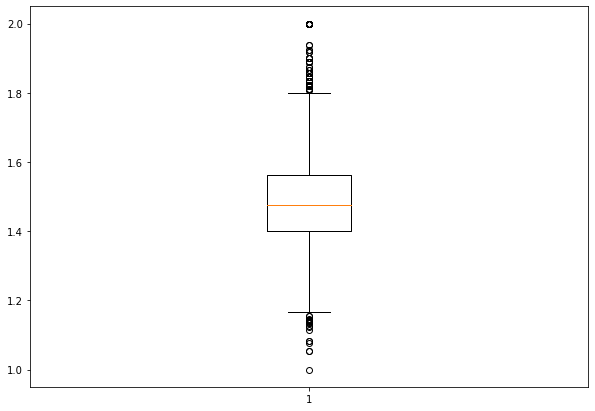

In [62]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(ratios)
 
# show plot
plt.show()

In [63]:
####    scalability tests preparation    #####

In [8]:
### make pruefercode with max n

def get_pruefer(min_n=0, max_n=10, len=8):
    return list(np.random.randint(low=min_n, high=(max_n), size=(len)))

In [7]:
### make tree from pruefercode

def get_pruefer_tree(pruefer_code):
    return nx.from_prufer_sequence(pruefer_code)

In [11]:
### make pruefercodes
### gets:       max_n - maximum height of any generated tree
### returns:    array of size (10,10) - 10 buckets of equal size from 5 to max_n (bucket list)
#                                     - with each: 10 random pruefer trees with height drawn with replacement from bucket list

def get_random_pruefer_trees(max_n):

    # split 1 to max_n in 10 buckets
    splitting = np.linspace(1, max_n, num=6).astype(int)
    print(splitting)

    helper_list = []
    # draw 5 times with replacement to get random list of max_n for each bucket
    for i in range(5):
        random_list = get_pruefer(min_n=splitting[i]+1, max_n=splitting[i+1]+1, len=5)
        print(random_list)

        #create pruefer codes and trees for each max_n in random_list
        i_helper_list = []
        for m_n in random_list:
            pruefer_code = get_pruefer(max_n=m_n+1, len=(m_n-1))
            print("max_n", m_n)
            print(len(pruefer_code))
            pruefer_tree = get_pruefer_tree(pruefer_code)
            print(pruefer_tree.size())

            #adjust labels and directedness of the trees
            nx.set_node_attributes(pruefer_tree, "A", "lbl")
            pruefer_tree = pruefer_tree.to_directed()

            #print("test")
            i_helper_list.append(pruefer_tree)
        helper_list.append(np.array(i_helper_list, dtype=object))

    random_pruefer_tree_array = np.array(helper_list, dtype=object)
    return random_pruefer_tree_array

In [12]:
#safe the random prufer code trees in blocks 

max_n = 100
#tree_array = get_random_pruefer_trees(max_n)

path = "/home/jana/Documents/BIONETs/Code/tree_match_approx_validator/all_other_data/scalability_trees/tree_blocks"

tree_array = get_random_pruefer_trees(max_n)

for i in range(tree_array[0].size):
    #determine the name of the folder
    max_n = (i+1)*20
    folder_path = path + "/" + str(max_n)
    os.mkdir(folder_path)
    #make folder
    for j in range(tree_array[0].size):
        #determine the name of the file
        tree_folder_path = folder_path + "/" + str(max_n) + "_" + str(j)
        os.mkdir(tree_folder_path)
        tree_path = tree_folder_path + '/1.gml'
        #safe file
        nx.write_gml(tree_array[i][j], tree_path)



[  1  20  40  60  80 100]
[18, 13, 2, 14, 15]
max_n 18
17
18
max_n 13
12
13
max_n 2
1
2
max_n 14
13
14
max_n 15
14
15
[27, 23, 21, 30, 38]
max_n 27
26
27
max_n 23
22
23
max_n 21
20
21
max_n 30
29
30
max_n 38
37
38
[42, 57, 58, 60, 42]
max_n 42
41
42
max_n 57
56
57
max_n 58
57
58
max_n 60
59
60
max_n 42
41
42
[69, 72, 70, 74, 68]
max_n 69
68
69
max_n 72
71
72
max_n 70
69
70
max_n 74
73
74
max_n 68
67
68
[82, 90, 95, 96, 89]
max_n 82
81
82
max_n 90
89
90
max_n 95
94
95
max_n 96
95
96
max_n 89
88
89


In [8]:
#make and safe tree_count prufer code trees of max_n for testing purposes and safe in rigt data format to path

max_n = 30
tree_count = 10
path = "/home/jana/Documents/BIONETs/Code/tree_match_approx_validator/all_other_data/scalability_trees/max_n_" + str(max_n) + "_trees/"

for i in range(tree_count):
    os.mkdir(path + '/max_n_' + str(max_n) +'_'+ str(i))
    tree_path = path + '/max_n_' + str(max_n) +'_'+ str(i) + '/1.gml'
    prufer = get_pruefer(max_n=max_n)
    tree = get_pruefer_tree(prufer)
    nx.set_node_attributes(tree, "A", "lbl")
    tree = tree.to_directed()
    nx.write_gml(tree, tree_path)

In [15]:
#try reading in the files to check for right data format for exact and approx measure

path = "/home/jana/Documents/BIONETs/Code/tree_match_approx_validator/all_other_data/scalability_trees/tree_blocks/20"
def get_graph_coll(path):
    graph_coll=[]
    listdir=os.listdir(path)
    for dire in listdir:
        print('dire: ', dire)
        graph_coll.append([])
        graphdir=os.listdir(path+'/'+dire)
        for graph_file in graphdir:
            print('file: ', graph_file)
            graph_coll[-1].append(nx.readwrite.gml.read_gml(path+'/'+dire+'/'+graph_file,label='id'))
    return graph_coll

In [16]:
#try reading in the files to check for right data format for exact and approx measure

path = "/home/jana/Documents/BIONETs/Code/tree_match_approx_validator/all_other_data/scalability_trees/tree_blocks_gml"

graph_coll = []
listdir=os.listdir(path)
for dire in listdir:
    print('big_dire: ', dire)
    block_dir= path + '/' + dire
    block_graph_coll = get_graph_coll(block_dir)
    graph_coll.append(block_graph_coll)

big_dire:  20
dire:  20_1
file:  1.gml
dire:  20_3
file:  3.gml
dire:  20_4
file:  4.gml
dire:  20_2
file:  2.gml
dire:  20_0
file:  0.gml
big_dire:  40
dire:  40_0
file:  0.gml
dire:  40_3
file:  3.gml
dire:  40_4
file:  4.gml
dire:  40_2
file:  2.gml
dire:  40_1
file:  1.gml
big_dire:  80
dire:  80_3
file:  3.gml
dire:  80_0
file:  0.gml
dire:  80_2
file:  2.gml
dire:  80_4
file:  4.gml
dire:  80_1
file:  1.gml
big_dire:  100
dire:  100_0
file:  0.gml
dire:  100_4
file:  4.gml
dire:  100_3
file:  3.gml
dire:  100_1
file:  1.gml
dire:  100_2
file:  2.gml
big_dire:  60
dire:  60_2
file:  2.gml
dire:  60_3
file:  3.gml
dire:  60_0
file:  0.gml
dire:  60_4
file:  4.gml
dire:  60_1
file:  1.gml


In [19]:
graph_coll[0]

[[<networkx.classes.digraph.DiGraph at 0x7f3bb038e970>],

In [138]:
listdir

['20', '40', '80', '100', '60']

In [96]:
df_approx = pd.read_csv (r'/home/jana/Documents/BIONETs/Code/tree_match_approx_validator/final_results_data/data/normalized_approx.csv', index_col=0)

In [97]:
df_approx

,PKB4,PKB6,PKB7,PKB8,PKB9,PKB10,PKB11,PKB13,PKB14,PKB15,...,PKB206,PKB207,PKB218,PKB233,PKB236,PKB240,PKB241,PKB242,PKB247,PKB248
PKB4,0.688525,0.004300,0.004300,0.004300,0.004300,0.004569,0.004031,0.004569,0.004569,0.004300,...,0.004569,0.005644,0.002898,0.003086,0.001016,0.005644,0.004300,0.003762,0.002956,0.002768
PKB6,0.004300,0.764706,0.009227,0.007689,0.014994,0.008074,0.009612,0.013072,0.008074,0.007689,...,0.005421,0.004309,0.002294,0.002346,0.000898,0.006151,0.005767,0.006536,0.004614,0.003045
PKB7,0.004300,0.009227,0.882353,0.008843,0.009227,0.007305,0.008843,0.011534,0.008458,0.009612,...,0.004783,0.004309,0.002415,0.002469,0.000859,0.005767,0.004998,0.005767,0.004998,0.002768
PKB8,0.004300,0.007689,0.008843,0.755102,0.007689,0.010829,0.007305,0.007689,0.010412,0.011600,...,0.004783,0.005232,0.002415,0.002593,0.000898,0.006247,0.005831,0.006664,0.004998,0.002630
PKB9,0.004300,0.014994,0.009227,0.007689,0.764706,0.008074,0.009612,0.013072,0.008074,0.007689,...,0.005421,0.004309,0.002294,0.002346,0.000898,0.006151,0.005767,0.006536,0.004614,0.003045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PKB240,0.005644,0.006151,0.005767,0.006247,0.006151,0.005414,0.005383,0.006151,0.006664,0.006800,...,0.004145,0.004001,0.002777,0.002963,0.000859,0.673469,0.005831,0.005831,0.003748,0.002491
PKB241,0.004300,0.005767,0.004998,0.005831,0.005767,0.006247,0.006920,0.006920,0.005414,0.004000,...,0.003508,0.004309,0.002657,0.002346,0.000781,0.005831,0.711111,0.008507,0.004444,0.002353
PKB242,0.003762,0.006536,0.005767,0.006664,0.006536,0.006664,0.005767,0.006920,0.005831,0.006000,...,0.004145,0.004001,0.002174,0.002099,0.000781,0.005831,0.008507,0.826087,0.004253,0.002353
PKB247,0.002956,0.004614,0.004998,0.004998,0.004614,0.005414,0.004229,0.004229,0.004581,0.004800,...,0.003827,0.003693,0.001449,0.001481,0.000430,0.003748,0.004444,0.004253,0.896552,0.001799


In [99]:
f= open("guru98.txt","a")
dfAsString = df_approx.to_string()
f.write(dfAsString)
#for i in range(10):
 #    f.write("This is line %d\r\n" % (i+1))
f.close()

In [55]:
from datetime import date, datetime

today = date.today()

In [102]:
today.strftime("%b_%d_%Y")

'Mar_08_2022'

In [58]:
now = datetime.now()

current_time = now.strftime("%H_%M")
print("Current Time =", current_time)

Current Time = 12_08


In [62]:
a = pd.read_csv(r'/home/jana/Documents/BIONETs/Code/tree_match_approx_validator/all_other_data/scalability_trees/max_n_10_trees_results_Mar_15_2022-12_11/df_times_gurobi.csv', index_col=0)

In [63]:
a

,max_n_10_7,max_n_10_3,max_n_10_6,max_n_10_1,max_n_10_5,max_n_10_9,max_n_10_8,max_n_10_0,max_n_10_2,max_n_10_4
max_n_10_7,0.026979,0.176254,0.207160,0.184549,0.267319,0.171379,0.307035,0.171519,0.054924,0.324131
max_n_10_3,0.454050,0.027729,0.228666,0.097951,0.121255,0.096768,0.312430,0.226852,0.466833,0.327159
max_n_10_6,0.071749,0.174121,0.055404,0.258985,0.285461,0.134028,0.075515,0.241159,0.205026,0.147814
max_n_10_1,0.116202,0.111901,0.126892,0.031524,0.092940,0.151493,0.310213,0.107482,0.170089,0.120198
max_n_10_5,0.309938,0.107039,0.153974,0.073281,0.066224,0.180387,0.195618,0.097849,0.176718,0.066534
max_n_10_9,0.070888,0.105299,0.281184,0.111137,0.101241,0.019482,0.371082,0.112218,0.129915,0.348776
max_n_10_8,0.453428,0.243026,0.065213,0.147926,0.198136,0.298846,0.064489,0.132632,0.371866,0.209067
max_n_10_0,0.113245,0.105865,0.318711,0.110608,0.118432,0.101765,0.324225,0.052569,0.073319,0.184547
max_n_10_2,0.110303,0.367295,0.132963,0.164725,0.172311,0.086022,0.246754,0.139488,0.057521,0.284830
max_n_10_4,0.136591,0.153718,0.130873,0.115085,0.064614,0.116574,0.139759,0.133284,0.136274,0.063686


In [64]:
a = pd.read_csv(r'/home/jana/Documents/BIONETs/Code/tree_match_approx_validator/all_other_data/scalability_trees/max_n_10_trees_results_Mar_15_2022-12_11/df_times_approx.csv', index_col=0)

In [65]:
a

,max_n_10_7,max_n_10_3,max_n_10_6,max_n_10_1,max_n_10_5,max_n_10_9,max_n_10_8,max_n_10_0,max_n_10_2,max_n_10_4
max_n_10_7,0.009480,0.011935,0.011134,0.010679,0.012364,0.012114,0.012760,0.011483,0.011987,0.010828
max_n_10_3,0.011136,0.012605,0.011275,0.010428,0.010090,0.009396,0.011804,0.011435,0.010537,0.015787
max_n_10_6,0.011414,0.013455,0.011890,0.011251,0.010813,0.010522,0.012393,0.010487,0.011854,0.010674
max_n_10_1,0.012196,0.010322,0.013677,0.010239,0.012363,0.011249,0.015593,0.010966,0.013617,0.017649
max_n_10_5,0.012576,0.011374,0.011866,0.013412,0.011371,0.013201,0.013467,0.013000,0.010811,0.012171
max_n_10_9,0.009723,0.010917,0.010780,0.012433,0.011512,0.011201,0.012171,0.013001,0.009621,0.012377
max_n_10_8,0.011280,0.010921,0.012353,0.010549,0.012730,0.011806,0.010964,0.012804,0.011054,0.012464
max_n_10_0,0.012283,0.011317,0.011390,0.011137,0.011857,0.011034,0.012172,0.014126,0.014037,0.011007
max_n_10_2,0.011396,0.011745,0.011511,0.011230,0.012271,0.011496,0.012647,0.013046,0.011651,0.013885
max_n_10_4,0.012649,0.014217,0.011660,0.013141,0.010930,0.012504,0.013036,0.011021,0.010688,0.011091


In [145]:
time_limit=np.zeros((10,10))

In [146]:
time_limit[0][0] = True

In [149]:
time_limit[1][0] == True

False

In [ ]:
for i in range(4):
    for j in range(4):
        print(i)
        print(j)
        if i == 2:
            print("i is 2")
            break
            break

In [ ]:
import signal

def long_funtion_call():
    #print("hello")
    while True:
        i = 0
        print(i)
        i +=1

def signal_handler(signum, frame):
    raise Exception("Timed out!")

signal.signal(signal.SIGALRM, signal_handler)
signal.alarm(5)   # Ten seconds

try:
    long_funtion_call()
    signal.alarm(0)
except Exception as msg:
    print("Timed out!")


In [ ]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(ratios)
 
# show plot
plt.show()

[Text(1, 0, 'ABC'), Text(2, 0, 'DEF')]

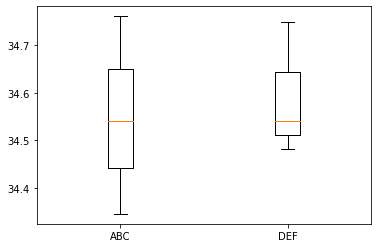

In [22]:
my_dict = {'ABC': [34.54, 34.345, 34.761], 'DEF': [34.541, 34.748, 34.482]}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

In [23]:
a = pd.read_csv(r'/home/jana/Documents/BIONETs/Code/tree_match_approx_validator/final_results_data/results/scalability_approx/20_results_4-APPROX_Mar_29_2022-11_07/df_times_4-APPROX.csv', index_col=0)

In [40]:
a_np = a.to_numpy()

In [43]:
block_times = a_np[a_np>0]


In [48]:
block_times.size

10

In [5]:
algorithm_small = 'approx'
algorithm = "4-APPROX"
max_n = 20
path = "/home/jana/Documents/BIONETs/Code/tree_match_approx_validator/final_results_data/results/scalability_" + algorithm_small + "/" + str(max_n) + "_results_" + algorithm + "_Mar_29_2022-11_07/df_times_" + algorithm + ".csv"

In [10]:


def get_times_dict(algorithm, algorithm_small):
    times_dict = {}
    for max_n in [20,40]:
        path = "/home/jana/Documents/BIONETs/Code/tree_match_approx_validator/final_results_data/results/scalability_" + algorithm_small + "/" + str(max_n) + "_results_" + algorithm + "_Mar_30_2022-22_58/df_times_" + algorithm + ".csv"
        df = pd.read_csv(path, index_col=0)
        df_np = df.to_numpy()
        block_times = df_np[df_np>0]
        times_dict[str(max_n)] = block_times
    return times_dict

In [11]:
algorithm_small = 'gurobi'
algorithm = "GUROBI"
times_dict = get_times_dict(algorithm, algorithm_small)


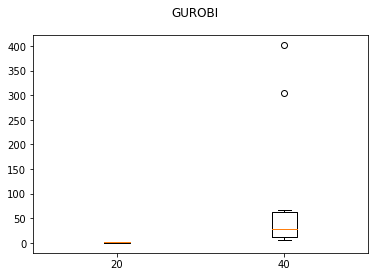

In [12]:
fig, ax = plt.subplots()
fig.suptitle(algorithm)
ax.boxplot(times_dict.values())
ax.set_xticklabels(times_dict.keys())
plt.show()